In [ ]:
!pip install tensorflow==2.16.0rc0
!PYTHONHASHSEED=0
!pip install patchify

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 589.8/589.8 MB 2.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.3/5.3 MB 63.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 58.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 79.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 62.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 347.7/347.7 kB 23.7 MB/s eta 0:00:00
  Attempting uninstall: ml-dtypes
    Found existing installation: ml-dtypes 0.2.0
    Uninstalling ml-dtypes-0.2.0:
      Successfully uninstalled ml-dtypes-0.2.0
  Attempting uninstall: h5py
    Found existing installation: h5py 3.9.0
    Uninstalling h5py-3.9.0:
      Successfully uninstalled h5py-3.9.0
  Attempting uninstall: tensorboard
    Found existing installation: tensorboard 2.15.2
    Uninstalling tensorboard-2.15.2:
      Successfully uninstalled tensorboard-2.15.2
  Attempting uninstall: keras
    Fo

In [ ]:
# Import other modules
from matplotlib import pyplot as plt
import zipfile
from shutil import copyfile
from time import time
import numpy as np
import pandas as pd
import random as python_random
import os
import shutil
import glob
from patchify import patchify, unpatchify
import random

# Import TensorFlow/Keras
import tensorflow as tf
import keras
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Conv3D, Conv3DTranspose, MaxPooling3D, concatenate, Dropout, Activation, BatchNormalization, GroupNormalization
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
import tensorflow.keras.backend as K


from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import tensorflow.keras.backend as K

def DiceCoefficient(y_true, y_pred, smooth = 1e-6):

    y_pred = tf.keras.activations.softmax(y_pred, axis = -1)

    # Cast to float32 datatype
    y_true = K.cast(y_true, 'float32')
    y_pred = K.cast(y_pred, 'float32')

    # Flatten label and prediction tensors
    inputs = K.flatten(y_pred)
    targets = K.flatten(y_true)

    intersection = K.sum(inputs * targets)
    dice = (2 * intersection + smooth) / (K.sum(targets) + K.sum(inputs) + smooth)
    return dice

In [ ]:
model = keras.saving.load_model('/content/drive/MyDrive/DL_PROJECT/2D_FINAL/64_Base.keras', compile = True , custom_objects={'DiceCoefficient' : DiceCoefficient})

In [ ]:
model.summary()

Model: "2D_U-Net"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)  │ (None, 128, 128, 4)    │              0 │ -                      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d (Conv2D)           │ (None, 128, 128, 64)   │          2,368 │ input_layer[0][0]      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ activation (Activation)   │ (None, 128, 128, 64)   │              0 │ conv2d[0][0]           │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dropout (Dropout)         │ (None, 128, 128, 64)   │              0 │ activation[0][0]       │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_1 (Conv2D)         │ (None, 128, 128, 64)   │         36,928 │ dropout[0][0]          │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ activation_1 (Activation) │ (None, 128, 128, 64)   │              0 │ conv2d_1[0][0]         │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ max_pooling2d             │ (None, 64, 64, 64)     │              0 │ activation_1[0][0]     │
│ (MaxPooling2D)            │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_2 (Conv2D)         │ (None, 64, 64, 128)    │         73,856 │ max_pooling2d[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ activation_2 (Activation) │ (None, 64, 64, 128)    │              0 │ conv2d_2[0][0]         │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dropout_1 (Dropout)       │ (None, 64, 64, 128)    │              0 │ activation_2[0][0]     │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_3 (Conv2D)         │ (None, 64, 64, 128)    │        147,584 │ dropout_1[0][0]        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ activation_3 (Activation) │ (None, 64, 64, 128)    │              0 │ conv2d_3[0][0]         │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ max_pooling2d_1           │ (None, 32, 32, 128)    │              0 │ activation_3[0][0]     │
│ (MaxPooling2D)            │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_4 (Conv2D)         │ (None, 32, 32, 256)    │        295,168 │ max_pooling2d_1[0][0]  │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ activation_4 (Activation) │ (None, 32, 32, 256)    │              0 │ conv2d_4[0][0]         │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dropout_2 (Dropout)       │ (None, 32, 32, 256)    │              0 │ activation_4[0][0]     │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_5 (Conv2D)         │ (None, 32, 32, 256)    │        590,080 │ dropout_2[0][0]        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ activation_5 (Activation) │ (None, 32, 32, 256)    │              0 │ conv2d_5[0][0]         │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ max_pooling2d_2      

 Total params: 93,097,549 (355.14 MB)

 Trainable params: 31,032,516 (118.38 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 62,065,033 (236.76 MB)

In [ ]:
vol = np.load('/content/drive/MyDrive/DL_PROJECT/Data/image_006.npy')
mask = np.load('/content/drive/MyDrive/DL_PROJECT/Data/mask_006.npy')

In [ ]:
def extract_images(volume):

  images = []

  for j in range(volume.shape[2]):
    images.append(volume[:, :, j, :])  # Append each slice to the images list

  images = np.array(images)

  return images

In [ ]:
def patches_to_minibatch(patch):

  minibatch = []

  for x in range(patch.shape[0]):

    for y in range(patch.shape[1]):

      minibatch.append(patch[x , y, 0, :, :, :])

  return np.array(minibatch)


In [ ]:
def reco_from_minibatch(minibatch):

  pre_unpatch = np.zeros(shape = (2, 2, 1, 128, 128, 4))

  pre_unpatch[0, 0, 0, :, :, :] = minibatch[0, :, :, :]
  pre_unpatch[0, 1, 0, :, :, :] = minibatch[1, :, :, :]
  pre_unpatch[1, 0, 0, :, :, :] = minibatch[2, :, :, :]
  pre_unpatch[1, 1, 0, :, :, :] = minibatch[3, :, :, :]


  return pre_unpatch

In [ ]:
def make_prediction_vol(images):

  vol_pred = []

  for slice in range(images.shape[0]):

    patches = patchify(images[slice, :, :, :], (128, 128, 4), step = 128)

    batch = patches_to_minibatch(patches)

    pred_batch = model.predict(batch, verbose = 0)

    pre_unpatch = reco_from_minibatch(pred_batch)

    reco_img = unpatchify(pre_unpatch, (256, 256, 4))

    img_pred = list(reco_img.argmax(axis = 2))

    vol_pred.append(img_pred)

  return np.array(vol_pred)

In [ ]:
images = extract_images(vol)
masks = extract_images(mask)

In [ ]:
masks.shape

(155, 256, 256, 4)

In [ ]:
prediction = make_prediction_vol(images)

In [ ]:
prediction.shape

(155, 256, 256)

In [ ]:
true_vol = masks.argmax(axis = 3)
true_vol.shape

(155, 256, 256)

Text(0.5, 1.0, 'Original Segmentation')

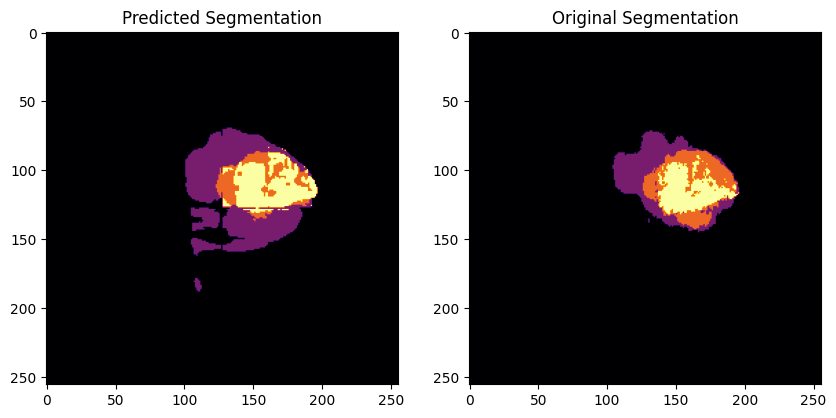

In [ ]:
n_slice = random.randint(0, true_vol.shape[0])

fig, axs = plt.subplots(1, 2, figsize=(10, 10))

axs[0].imshow(prediction[n_slice, :, :], cmap = 'inferno')
axs[0].set_title('Predicted Segmentation')


axs[1].imshow(true_vol[n_slice, :, :], cmap = 'inferno')
axs[1].set_title('Original Segmentation')